# Проект по анализу рынка видеоигр и прогнозированию рекламных кампаний.

Описание проекта:

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

План проекта:

Шаг 1. Открыть файл с данными и изучить общую информацию

Шаг 2. Подготовить данные

- Заменить названия столбцов (привести к нижнему регистру);
- Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему;
- Обработать пропуски при необходимости:
    - Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать;
    - Описать причины, которые могли привести к пропускам;
    - Обратить внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разобрать это значение и описать, как его обработать;
- Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

Шаг 3. Провести исследовательский анализ данных

- Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывать в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Описать результат.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулировать выводы.
- Соотнести выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Шаг 4. Составить портрет пользователя каждого региона

- Определите для пользователя каждого региона (NA, EU, JP):

    - Самые популярные платформы (топ-5). Описать различия в долях продаж.
    - Самые популярные жанры (топ-5). Пояснить разницу.
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Шаг 5. Провеить гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задать самостоятельно пороговое значение alpha.

Пояснить:

- Как мы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

Шаг 6. Написать общий вывод

Шаг 1. Открыть файл с данными и изучить общую информацию

Импортируем базу данных и все необходимые для анализа библиотеки. Посмотрим таблицу и информацию по ней.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
df = pd.read_csv('/datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


16715 строчек с данными - вероятно 1 игра занимает 1 строчку. 11 колонок. Year_of_Release привести к int. User_score перевести во float64. 2 пропуска в столбце name и столбце genre - вероятно они связаны, надо найти причину. Около 250 пропусков в столбце year_of_release - также надо найти причину. Critic_Score, User_Score, Rating имеют больше всего пропусков - рассмотрим и это подробнее. Возможно все пропуски связаны с тем что это 2016 год, а там неполные данные.

    Шаг 2. Подготовить данные.

- Заменить названия столбцов (привести к нижнему регистру);
- Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему;
- Обработать пропуски при необходимости:
    - Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать;
    - Описать причины, которые могли привести к пропускам;
    - Обратить внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разобрать это значение и описать, как его обработать;
- Посчитайть суммарные продажи во всех регионах и запишисать их в отдельный столбец.

Приведем к нижнему регистру названия столбцов.

In [3]:
df.columns = df.columns.str.lower()

Проверим

In [4]:
df.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему.

Сначала приведем столбец year_of_release к целочисленным значениям. У показателей года нет десятых долей. 

In [5]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


Теперь переведем user_score во float64 - числа с десятыми долями, а не object. Используем метод to_numeric с параметром coerce, так как знаем, что там есть значения "tbd".

In [7]:
df['user_score'] = pd.to_numeric(df['user_score'], errors = 'coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Отлично.

Займемся пропусками. Посмотрим на name и genre, может быть они на самом деле связаны.

In [9]:
df.query('name.isnull() or genre.isnull()', engine='python')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Да, это одни и те же строки. 2 значения из 16715 это несущественно и их можно было бы удалить. Тем более это 1993 год, платформа GEN - мягко говоря, неактуально. Но лучше этого не делать, не будем нарушать целостность. Пропуски вероятно появились, потому что информации по этим играм не было изначально, хотя в Северной Америке игра #659 была достаточно популярна. Заполним пропуски в столбце name значениями noname_1 и noname_2, а в столбце genre укажем самый популярный жанр среди всех игр 1993 года.

In [10]:
df.loc[659, 'name'] = 'noname_1'

In [11]:
df.loc[659]

name               noname_1
platform                GEN
year_of_release        1993
genre                   NaN
na_sales               1.78
eu_sales               0.53
jp_sales                  0
other_sales            0.08
critic_score            NaN
user_score              NaN
rating                  NaN
Name: 659, dtype: object

In [12]:
df.loc[14244, 'name'] = 'noname_2'

In [13]:
df.loc[14244]

name               noname_2
platform                GEN
year_of_release        1993
genre                   NaN
na_sales                  0
eu_sales                  0
jp_sales               0.03
other_sales               0
critic_score            NaN
user_score              NaN
rating                  NaN
Name: 14244, dtype: object

Для корректной работы метода query заполним пропуски в столбце year_of_release нулями.

In [14]:
df['year_of_release'] = df['year_of_release'].fillna(0)

In [15]:
df.query('year_of_release == 1993', engine='python')['genre'].value_counts()

Fighting        11
Platform        11
Role-Playing     9
Sports           9
Action           6
Misc             3
Puzzle           3
Racing           2
Strategy         2
Shooter          2
Simulation       1
Adventure        1
Name: genre, dtype: int64

Platform и Fighting по 11 игр. Тогда заполним первый - Platform, а второй - Fighting.

In [16]:
df.loc[659, 'genre'] = 'Platform'

In [17]:
df.loc[14244, 'genre'] = 'Fighting'

Отлично.

Теперь посмотрим на year_of_release.

In [18]:
df.query('year_of_release == 0', engine='python')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,0,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,0,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,0,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,0,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,0,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


269 пропусков. Возможно у нас получится заполнить часть пропусков - в таблице игры занимают не одну строчку (для разных платформ). Соответственно, если у одной из записей уже есть год выпуска, то он может появиться и у другой.
Проверим на основе Madden NFL 2004.

In [19]:
df.query('name == "Madden NFL 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


Так и есть, год выпуска - 2003. Теперь надо написать формулу для заполнения. Но сначала вернем пропущенные значения.

In [20]:
df['year_of_release'] = df['year_of_release'].replace({0: np.nan})

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [22]:
df['year_of_release'] = df.groupby('name').year_of_release.transform(
    lambda x: x.fillna(x.mean()))

Проверим локально и глобально.

In [23]:
df.query('name == "Madden NFL 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2003.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [24]:
df.query('year_of_release.isnull()', engine = 'python')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,NaN,E10+
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Осталось 146 игр. Подставим средние значения года выпуска игр по платформе - их цикл жизни отонсительно непродолжителен.

In [25]:
df['year_of_release'] = df.groupby('platform').year_of_release.transform(
    lambda x: x.fillna(x.mean()))

In [26]:
df.query('year_of_release.isnull()', engine = 'python')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Теперь вернем значения в этом столбце к целочисленным.

In [27]:
df['year_of_release'] = df['year_of_release'].astype(np.int64)

Проверим

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Отлично.

Рассмотрим столбец critic_score.

In [29]:
df.query('critic_score.isnull()', engine ='python')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


8578 пропсуков. Сравним с user_score и rating, возможно есть какая-то взаимосвязь.

In [30]:
df.query('user_score.isnull()', engine ='python')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


6701 пропуск.

In [31]:
df.query('rating.isnull()', engine ='python')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


6766 пропусков. Попробуем отсортировать их вместе.

In [32]:
df.query('critic_score.isnull() and user_score.isnull() and rating.isnull()', engine ='python')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


6621 игра, в которой нет ни одной оценки. Но связи не прослеживается. Возьмем случайную выборку.

In [33]:
df.query('critic_score.isnull() and user_score.isnull() and rating.isnull()', engine ='python').sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12273,Cardfight!! Vanguard: Lock On Victory!!,3DS,2014,Misc,0.00,0.00,0.07,0.00,NaN,NaN,NaN
8422,Dragon Quest X,3DS,2014,Role-Playing,0.00,0.00,0.17,0.00,NaN,NaN,NaN
3055,Puzzler Brain Games,Wii,2012,Puzzle,0.00,0.00,0.66,0.00,NaN,NaN,NaN
9967,Stolen Song,PS,1998,Adventure,0.00,0.00,0.11,0.01,NaN,NaN,NaN
15492,Crayon Shin-Chan: Uchuu de Achoo!? Yuujou no O...,3DS,2011,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN
8442,Mousetrap / Operation / Simon,GBA,2005,Misc,0.12,0.04,0.00,0.00,NaN,NaN,NaN
9097,Yu-Gi-Oh! Monster Capture GB,GB,2000,Role-Playing,0.00,0.00,0.14,0.00,NaN,NaN,NaN
1388,Inazuma Eleven 2,DS,2009,Role-Playing,0.00,0.19,1.18,0.03,NaN,NaN,NaN
16376,Dragon Quest X: All in One Package,WiiU,2015,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
14567,Tokimeki Memorial Girl's Side 1st Love Plus,DS,2009,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Либо очень низкие продажи, либо очень старая игра. Сделаем еще одну выборку.

In [34]:
df.query('critic_score.isnull() and user_score.isnull() and rating.isnull()', engine ='python').sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15536,Uchuu Keiji Tamashii: The Space Sheriff Spirits,PS2,2006,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN
9275,Interactive Sampler Disc 6,PS,1997,Misc,0.08,0.05,0.00,0.01,NaN,NaN,NaN
3201,X-Man,2600,1982,Action,0.58,0.04,0.00,0.01,NaN,NaN,NaN
6223,Yu-Gi-Oh! Monster Capsule Breed & Battle,PS,1998,Role-Playing,0.00,0.00,0.26,0.02,NaN,NaN,NaN
12242,Yoake Yori Ruriiro na: Brighter than Dawning Blue,PS2,2006,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12463,Risen 3: Titan Lords,PS4,2015,Role-Playing,0.00,0.05,0.00,0.01,NaN,NaN,NaN
14924,Tokushu Houdoubu,PSV,2012,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN
7733,Danganronpa 2: Goodbye Despair,PSP,2012,Misc,0.00,0.00,0.19,0.00,NaN,NaN,NaN
13110,Utawarerumono: Futari no Hakuoro,PS4,2016,Misc,0.00,0.00,0.05,0.00,NaN,NaN,NaN
748,Donkey Kong Country,GB,2000,Platform,1.04,0.72,0.30,0.13,NaN,NaN,NaN


Теория немного подтверждается. Но заполнять такое большое количество пропусков заведомо неверными значениями не стоит. Слишком велико влияние на итоговую аналитику. Поэтому оставим все как есть.

Обратим внимание на аббревиатуру 'tbd' в столбцах с рейтингом.

In [35]:
df.query('user_score == "tbd"', engine ='python')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


В терминологии значение tbd означает to be determined, то есть значение будет определено позже. Но это значение присутствует у игр и 2003 года, и 2008, и 2011. Либо 2424 игры в данный момент на самом деле находятся на процедуре пересмотра пользовательской оценки, либо для оценки недостаточно данных и сервис ждет порогового значения для правильности. В любом случае заменить эти значения нельзя.

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [36]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales']

Проверим.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
total_sales        16715 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


Вывод по шагу 1 и 2:
- В таблице 16715 игр. Некоторые игры записаны несколько раз, так как они были выпущены для разных платформ.
- 11 колонок. 
- Year_of_Release привели к int. 
- User_score перевели во float64. 
- 2 пропуска в столбце name и столбце genre  устранили - они были связаны, причина скорее всего в давности лет. 
- 269 пропусков в столбце year_of_release - причина вероятно в человеческом факторе. Сначала подставили значения от тех же игр, но с других платформ, а потом подставили средние значения года выпуска по платформе. 
- Critic_Score, User_Score, Rating имеют больше всего пропусков, но для их устранения недостаточно данных. Количество пропусков слишком велико для подставления чего-то заведомо ложного. 
- Значение tbd в столбце user_score означает to be determined, то есть значение будет определено позже.Либо 2424 игры в данный момент на самом деле находятся на процедуре пересмотра пользовательской оценки, либо для оценки недостаточно данных и сервис ждет порогового значения для правильности. В любом случае заменить эти значения нельзя.

Шаг 3. Провести исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Построим гистограмму.

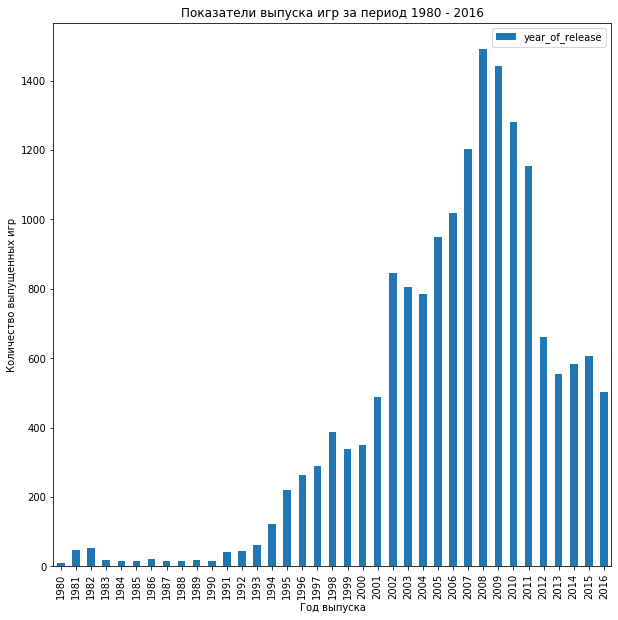

In [38]:
df.groupby(['year_of_release']).agg({'year_of_release':'count'}).plot(kind='bar',figsize=(10,10))
plt.title("Показатели выпуска игр за период 1980 - 2016")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend()
plt.show()

Пик производства игр находится в 2008-2010 годах. Факторы для этого могут быть разные - от засилья разных платформ и необходимости портировать каждую игру на каждую платформу до мирового экономического кризиса и освободившегося свободного времени у большого количества взрослого населения планеты. Также теоритически это можно было бы связать с развитием смартфона как мобильной платформы для игр, но в данной таблице это не уитывается.
Стоит отметить, что до 1995 года количество выпускаемых игр было слишком мало для анализа, но в те времена было несколько хитов с огромными продажами, которые не стоило бы отметать. Сравним оба периода.

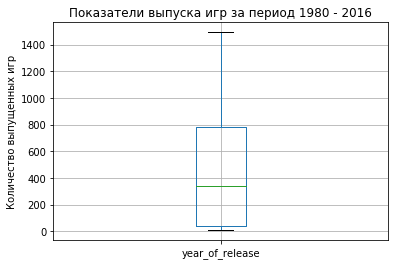

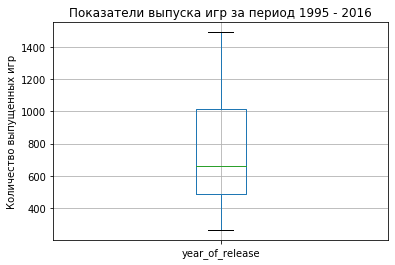

In [39]:
df.groupby(['year_of_release']).agg({'year_of_release':'count'}).boxplot()
plt.title("Показатели выпуска игр за период 1980 - 2016")
plt.ylabel("Количество выпущенных игр")
plt.show()
df.query('year_of_release > 1995').groupby(['year_of_release']).agg({'year_of_release':'count'}).boxplot()
plt.title("Показатели выпуска игр за период 1995 - 2016")
plt.ylabel("Количество выпущенных игр")
plt.show()

Отличия безусловно есть. Среднее количество и ящик продаж за период с 1980 года намного меньше в абсолютном исчислении. 

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Сначала построим гистограмму.

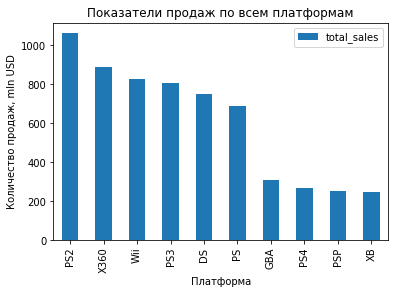

In [40]:
top_platforms = df.pivot_table(index = 'platform', 
                               values = 'total_sales', 
                               aggfunc = 'sum').sort_values(by='total_sales', 
                                                            ascending = False).head(10)
top_platforms.plot(kind='bar')
plt.title("Показатели продаж по всем платформам")
plt.xlabel("Платформа")
plt.ylabel("Количество продаж, mln USD")
plt.legend()
plt.show()

6 платформ имеют существенный отрыв, в 2 раза, по отношению к остальным четырем. 

Построим гистограммы по каждой платформе из 6 топовых.

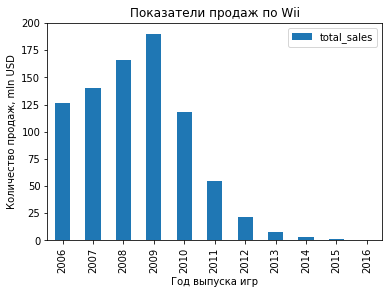

In [41]:
df.query('platform == "Wii"').pivot_table(index='year_of_release', 
                                          values='total_sales', 
                                          aggfunc='sum').plot.bar(ylim=(0,200))
plt.title("Показатели продаж по Wii")
plt.xlabel("Год выпуска игр")
plt.ylabel("Количество продаж, mln USD")
plt.show()

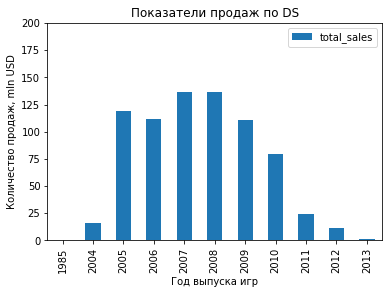

In [42]:
df.query('platform == "DS"').pivot_table(index='year_of_release', 
                                                    values='total_sales', 
                                                    aggfunc='sum').plot.bar(ylim=(0,200))
plt.title("Показатели продаж по DS")
plt.xlabel("Год выпуска игр")
plt.ylabel("Количество продаж, mln USD")
plt.show()

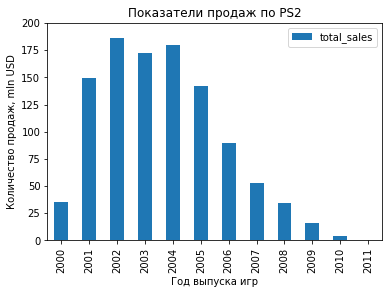

In [43]:
df.query('platform == "PS2"').pivot_table(index='year_of_release', 
                                                     values='total_sales', 
                                                     aggfunc='sum').plot.bar(ylim=(0,200))
plt.title("Показатели продаж по PS2")
plt.xlabel("Год выпуска игр")
plt.ylabel("Количество продаж, mln USD")
plt.show()

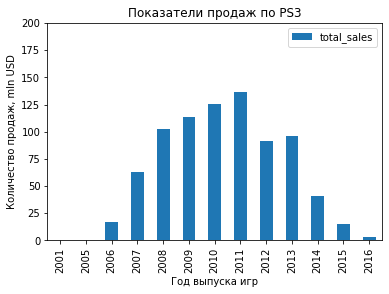

In [44]:
df.query('platform == "PS3"').pivot_table(index='year_of_release', 
                                          values='total_sales', 
                                          aggfunc='sum').plot.bar(ylim=(0,200))
plt.title("Показатели продаж по PS3")
plt.xlabel("Год выпуска игр")
plt.ylabel("Количество продаж, mln USD")
plt.show()

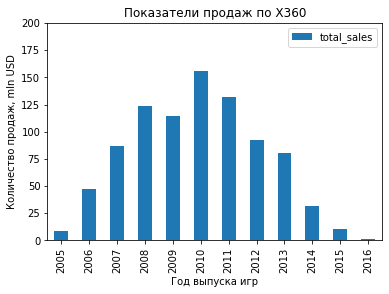

In [45]:
df.query('platform == "X360"').pivot_table(index='year_of_release', 
                                           values='total_sales', 
                                           aggfunc='sum').plot.bar(ylim=(0,200))
plt.title("Показатели продаж по X360")
plt.xlabel("Год выпуска игр")
plt.ylabel("Количество продаж, mln USD")
plt.show()

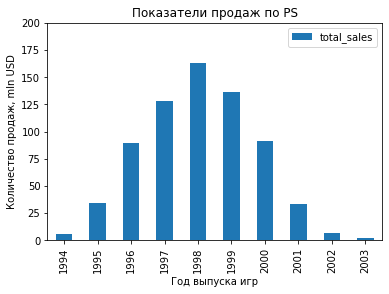

In [46]:
df.query('platform == "PS"').pivot_table(index='year_of_release', 
                                         values='total_sales', 
                                         aggfunc='sum').plot.bar(ylim=(0,200))
plt.title("Показатели продаж по PS")
plt.xlabel("Год выпуска игр")
plt.ylabel("Количество продаж, mln USD")
plt.show()

По этим гистограммам можно сделать заключение, что насколько бы успешной платформа на любом из рынков не была - ее цикл жизни составляет от 6 до 8 лет.

Возьмем данные за актуальный период. Для нас таковым будет являться отрезок с 2010 года (принимаем во внимание уровень продаж и показатели выпуска игр из исследования выше) по 2016 год. 

Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ. При этом оставим выбор из всех платформ, возможно какие-то только набирают свой ход. 

In [47]:
actual_time = df.query('year_of_release > 2009').pivot_table(index='year_of_release', 
                                                             columns='platform', 
                                                             values='total_sales', 
                                                             aggfunc='sum')
actual_time


platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2010,0.28,79.79,22.91,4.44,125.94,NaN,31.44,NaN,118.41,NaN,156.28,NaN
2011,58.80,24.44,29.82,0.35,136.21,NaN,16.98,4.00,54.50,NaN,132.38,NaN
2012,49.14,11.01,20.61,NaN,91.64,NaN,7.76,13.65,21.33,16.30,92.34,NaN
2013,54.40,1.42,11.83,NaN,95.85,22.12,3.34,9.14,7.87,20.12,80.82,17.21
2014,41.75,NaN,12.38,NaN,40.88,84.22,0.24,10.79,3.45,20.35,31.61,49.26
2015,26.75,NaN,7.93,NaN,14.70,100.44,0.12,5.93,1.05,15.22,10.86,54.67
2016,14.50,NaN,4.89,NaN,3.23,59.01,NaN,4.10,0.17,4.25,1.40,23.91


Построим гистограмму.

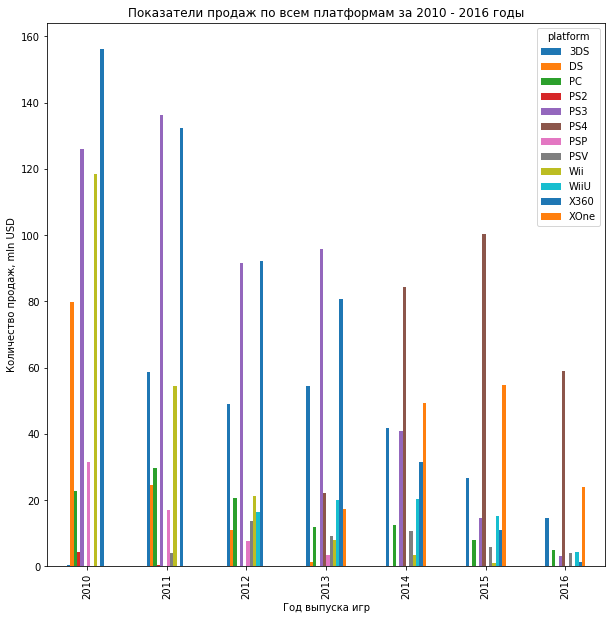

In [48]:
actual_time.plot(kind='bar',figsize=(10,10))
plt.title("Показатели продаж по всем платформам за 2010 - 2016 годы")
plt.xlabel("Год выпуска игр")
plt.ylabel("Количество продаж, mln USD")
plt.show()

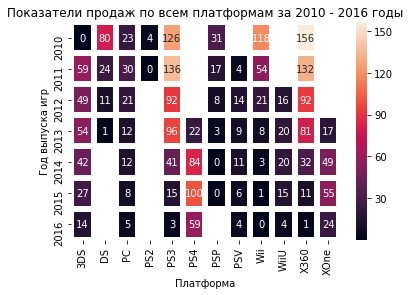

In [49]:
sns.heatmap(actual_time, annot=True, fmt=".0f", linewidths=5)
plt.title("Показатели продаж по всем платформам за 2010 - 2016 годы")
plt.xlabel("Платформа")
plt.ylabel("Год выпуска игр")
plt.show()

12 актуальных на начало 2010 года платформ, из которых 3 уже не поддерживаются, а хотя бы те же самые показатели в 2017, что и в 2016, могли бы показать только 2 платформы - PS4 и XOne - и обе находятся на излете своего цикла, грядут релизы новых платформ. Стабильнее остальных платформа 3DS, но прибыльность на ней будет еще ниже. Традиционно актуален PC, но доход там весьма мал. Оставим только PS4 и XOne.

In [50]:
actual = df.query('platform == "PS4" or platform == "XOne"')
actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,12.25
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,10.65
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,7.30
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,6.70
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,6.43
...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,NaN,0.01


639 игр.

Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? 

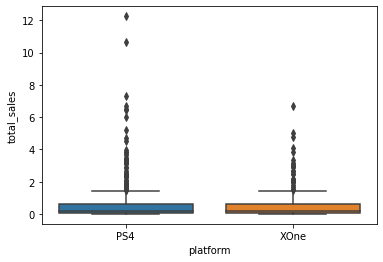

In [51]:
sns.boxplot(x="platform", y="total_sales", data=actual, orient="v")

Максимально схожие уровни продаж. Отличия только в выбросах.

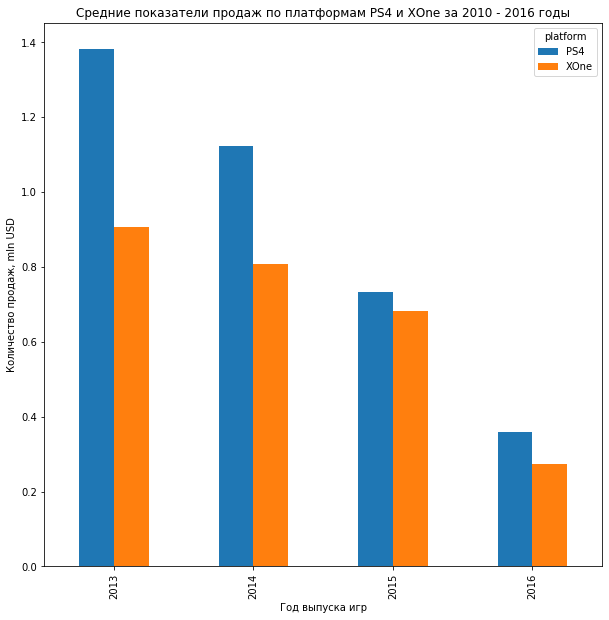

In [52]:
actual.pivot_table(index='year_of_release', 
                        columns='platform', 
                        values='total_sales', 
                        aggfunc='mean').plot(kind='bar',figsize=(10,10))

plt.title("Средние показатели продаж по платформам PS4 и XOne за 2010 - 2016 годы")
plt.xlabel("Год выпуска игр")
plt.ylabel("Количество продаж, mln USD")
plt.show()

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

Возьмем платформу PS4 как самую актуальную.

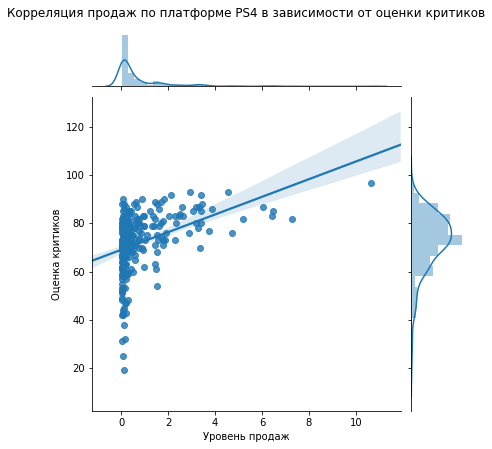

Корреляция между уровнем продаж игр и их оценкой критиками на платформе PS4 равна 0.40588677465201267


In [53]:
sns.jointplot(x='total_sales', y='critic_score', data=actual.query('platform == "PS4"'), kind="reg")
plt.title("Корреляция продаж по платформе PS4 в зависимости от оценки критиков", pad=80)
plt.xlabel("Уровень продаж")
plt.ylabel("Оценка критиков")
plt.show()
print("Корреляция между уровнем продаж игр и их оценкой критиками на платформе PS4 равна", 
      actual.query('platform == "PS4"')['total_sales'].corr(actual.query('platform == "PS4"')['critic_score']))

Умеренная корреляция.

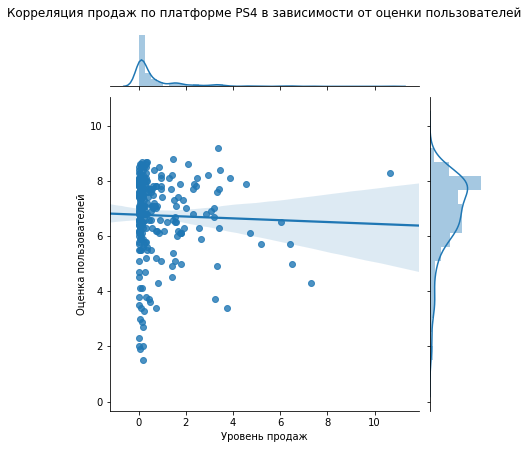

Корреляция между уровнем продаж игр и их оценкой пользователями на платформе PS4 равна -0.03126053686666918


In [54]:
sns.jointplot(x='total_sales', y='user_score', data=actual.query('platform == "PS4"'), kind="reg")
plt.title("Корреляция продаж по платформе PS4 в зависимости от оценки пользователей", pad=80)
plt.xlabel("Уровень продаж")
plt.ylabel("Оценка пользователей")
plt.show()
print("Корреляция между уровнем продаж игр и их оценкой пользователями на платформе PS4 равна", 
      actual.query('platform == "PS4"')['total_sales'].corr(actual.query('platform == "PS4"')['user_score']))


Нулевая корреляция.

Оценки критиков влияют на продажи намного существеннее чем оценки пользователей, но при этом корреляция остается умеренной и не является главным фактором роста продаж.

Соотнесем с продажами игр на других платформах - XOne и 3DS.

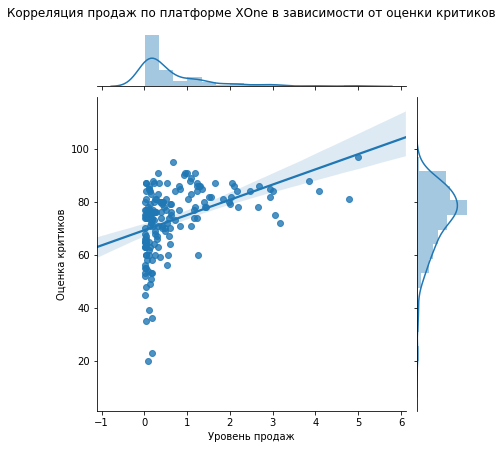

Корреляция между уровнем продаж игр и их оценкой критиками на платформе XOne равна 0.41720638309101765


In [55]:
sns.jointplot(x='total_sales', y='critic_score', data=actual.query('platform == "XOne"'), kind="reg")
plt.title("Корреляция продаж по платформе XOne в зависимости от оценки критиков", pad=80)
plt.xlabel("Уровень продаж")
plt.ylabel("Оценка критиков")
plt.show()
print("Корреляция между уровнем продаж игр и их оценкой критиками на платформе XOne равна", 
      actual.query('platform == "XOne"')['total_sales'].corr(actual.query('platform == "XOne"')['critic_score']))

Чуть сильнее чем у PS4.

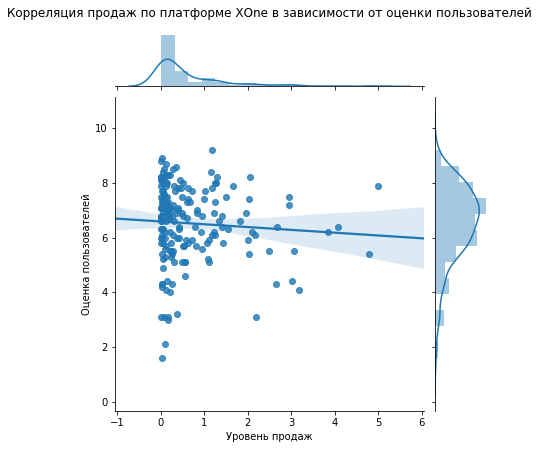

Корреляция между уровнем продаж игр и их оценкой пользователями на платформе XOne равна -0.06880394425598693


In [56]:
sns.jointplot(x='total_sales', y='user_score', data=actual.query('platform == "XOne"'), kind="reg")
plt.title("Корреляция продаж по платформе XOne в зависимости от оценки пользователей", pad=80)
plt.xlabel("Уровень продаж")
plt.ylabel("Оценка пользователей")
plt.show()
print("Корреляция между уровнем продаж игр и их оценкой пользователями на платформе XOne равна", 
      actual.query('platform == "XOne"')['total_sales'].corr(actual.query('platform == "XOne"')['user_score']))

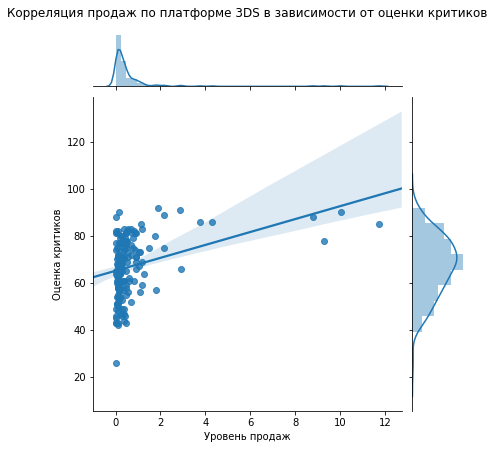

Корреляция между уровнем продаж игр и их оценкой критиками на платформе XOne равна 0.3506217069195197


In [57]:
sns.jointplot(x='total_sales', y='critic_score', data=df.query('platform == "3DS"'), kind="reg")
plt.title("Корреляция продаж по платформе 3DS в зависимости от оценки критиков", pad=80)
plt.xlabel("Уровень продаж")
plt.ylabel("Оценка критиков")
plt.show()
print("Корреляция между уровнем продаж игр и их оценкой критиками на платформе XOne равна", 
      df.query('platform == "3DS"')['total_sales'].corr(df.query('platform == "3DS"')['critic_score']))

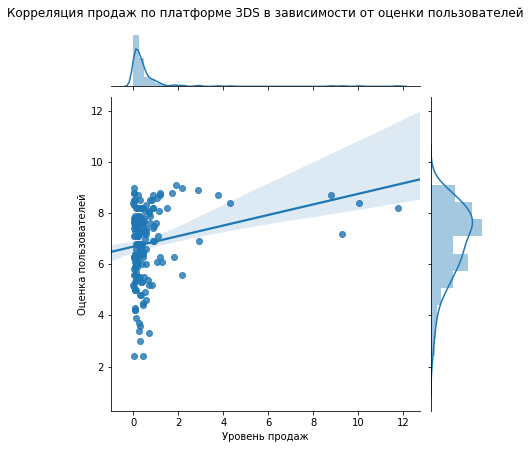

Корреляция между уровнем продаж игр и их оценкой пользователями на платформе XOne равна 0.22705554104025097


In [58]:
sns.jointplot(x='total_sales', y='user_score', data=df.query('platform == "3DS"'), kind="reg")
plt.title("Корреляция продаж по платформе 3DS в зависимости от оценки пользователей", pad=80)
plt.xlabel("Уровень продаж")
plt.ylabel("Оценка пользователей")
plt.show()
print("Корреляция между уровнем продаж игр и их оценкой пользователями на платформе XOne равна", 
      df.query('platform == "3DS"')['total_sales'].corr(df.query('platform == "3DS"')['user_score']))

Сильнее чем у других платформ, но все еще слабая.

Получилось, что влияние критиков и пользователей по плафтормам на продажи игр очень схожее. Практически не отличается.

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

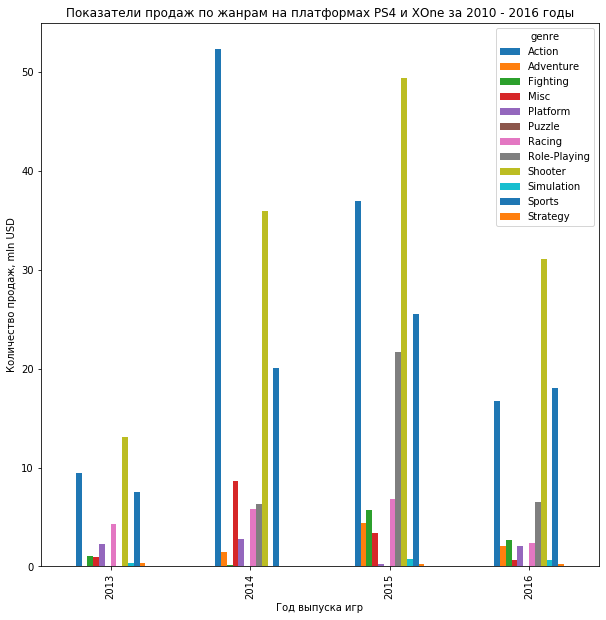

In [59]:
actual.pivot_table(index='year_of_release', 
                        columns='genre', 
                        values='total_sales', 
                        aggfunc='sum').plot(kind='bar',figsize=(10,10))
plt.title("Показатели продаж по жанрам на платформах PS4 и XOne за 2010 - 2016 годы")
plt.xlabel("Год выпуска игр")
plt.ylabel("Количество продаж, mln USD")
plt.show()

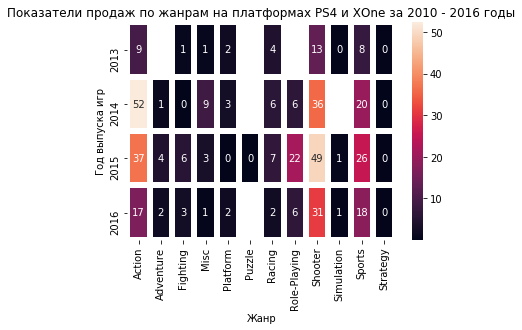

In [60]:
sns.heatmap(actual.pivot_table(index='year_of_release', 
                                    columns='genre', 
                                    values='total_sales', 
                                    aggfunc='sum'), annot=True, fmt=".0f", linewidths=5)
plt.title("Показатели продаж по жанрам на платформах PS4 и XOne за 2010 - 2016 годы")
plt.xlabel("Жанр")
plt.ylabel("Год выпуска игр")
plt.show()

Для полнотоы картины посмотрим на  данные по всем платформам за актуальный период.

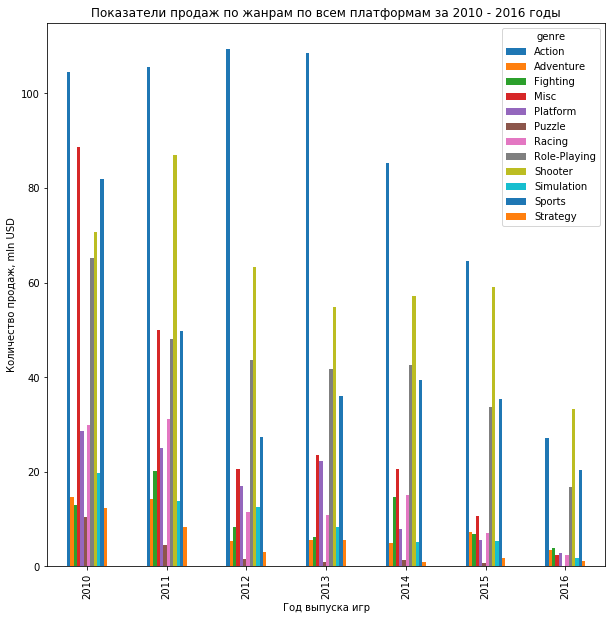

In [61]:
df.query('year_of_release > 2009').pivot_table(index='year_of_release', 
                        columns='genre', 
                        values='total_sales', 
                        aggfunc='sum').plot(kind='bar',figsize=(10,10))
plt.title("Показатели продаж по жанрам по всем платформам за 2010 - 2016 годы")
plt.xlabel("Год выпуска игр")
plt.ylabel("Количество продаж, mln USD")
plt.show()

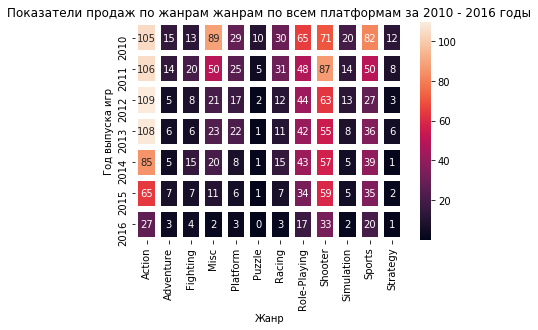

In [62]:
sns.heatmap(df.query('year_of_release > 2009').pivot_table(index='year_of_release', 
                                    columns='genre', 
                                    values='total_sales', 
                                    aggfunc='sum'), annot=True, fmt=".0f", linewidths=5)
plt.title("Показатели продаж по жанрам жанрам по всем платформам за 2010 - 2016 годы")
plt.xlabel("Жанр")
plt.ylabel("Год выпуска игр")
plt.show()

Топ жанров - Shooter, Action, Sports. Небольшой рост за последние два года показал жанр Platform. Безусловно низкие продажи у жанров Puzzle, Misc, Strategy и Simulation.

Вывод по шагу 3:
За все время в этой выборки было выпущено 16715 игр, включая мультиплатформенные. Но активный период производства игр и их коммерческой выгоды начался только в 1995 году. Для наших же задач актуальным будет период с 2010 года.
Цикл жизни каждой платформы, при условии что она достаточно успешна, равняется 5-7 годам. Далее на нее спрос окончательно снижается и игры для нее не выпускаются.
На 2017 наиболее перспективными выглядят платформы XOne и PS4, при том что по структуре продаж они практически не отличаются. Все решают игры, которые дают наибольшие продажи.
Отзывы пользователей никак не влияют на продажи, а вот отзывы критиков имеют умеренное влияния на общую выручку. Это касается всех изученных платформ. 
Приоритетными жанрами являются Shooter, Action и Sports и Role-Playing.

Шаг 4. Составить портрет пользователя каждого региона

- Определите для пользователя каждого региона (NA, EU, JP):

    - Самые популярные платформы (топ-5). Описать различия в долях продаж.
    - Самые популярные жанры (топ-5). Пояснить разницу.
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Начнем с платформ.

Северная Америка.

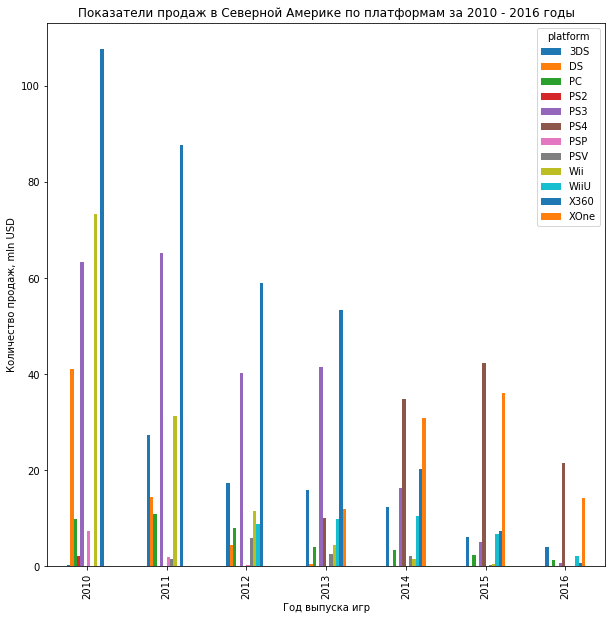

In [63]:
df.query('year_of_release > 2009').pivot_table(index='year_of_release', 
                    columns='platform', 
                    values='na_sales', 
                    aggfunc='sum').plot(kind='bar',figsize=(10,10))
plt.title("Показатели продаж в Северной Америке по платформам за 2010 - 2016 годы")
plt.xlabel("Год выпуска игр")
plt.ylabel("Количество продаж, mln USD")
plt.show()

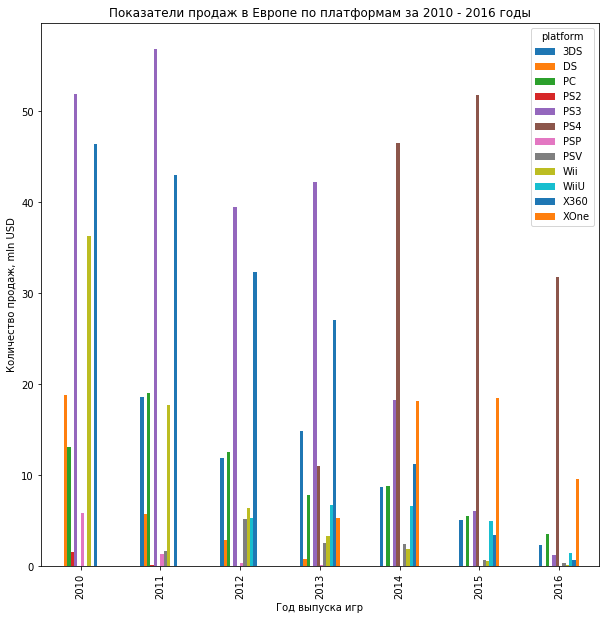

In [64]:
df.query('year_of_release > 2009').pivot_table(index='year_of_release', 
                    columns='platform', 
                    values='eu_sales', 
                    aggfunc='sum').plot(kind='bar',figsize=(10,10))
plt.title("Показатели продаж в Европе по платформам за 2010 - 2016 годы")
plt.xlabel("Год выпуска игр")
plt.ylabel("Количество продаж, mln USD")
plt.show()

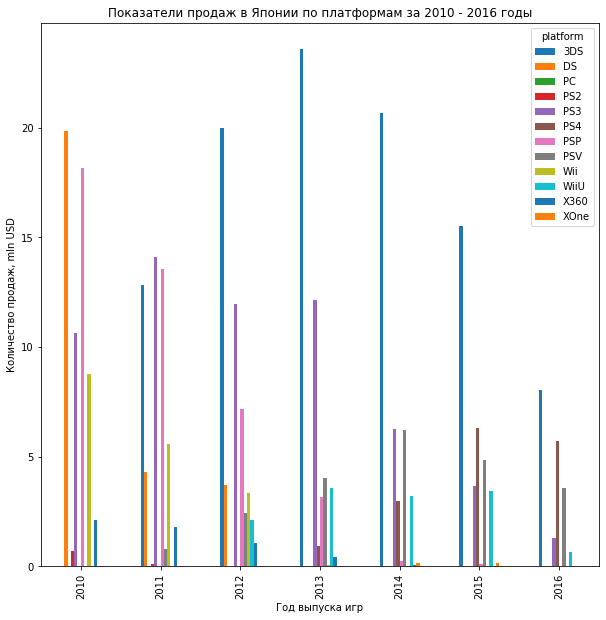

In [65]:
df.query('year_of_release > 2009').pivot_table(index='year_of_release', 
                    columns='platform', 
                    values='jp_sales', 
                    aggfunc='sum').plot(kind='bar',figsize=(10,10))
plt.title("Показатели продаж в Японии по платформам за 2010 - 2016 годы")
plt.xlabel("Год выпуска игр")
plt.ylabel("Количество продаж, mln USD")
plt.show()

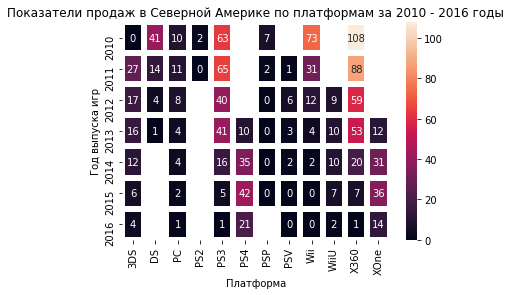

In [66]:
sns.heatmap(df.query('year_of_release > 2009').pivot_table(index='year_of_release', 
                    columns='platform', 
                    values='na_sales', 
                    aggfunc='sum'), annot=True, fmt=".0f", linewidths=5)
plt.title("Показатели продаж в Северной Америке по платформам за 2010 - 2016 годы")
plt.xlabel("Платформа")
plt.ylabel("Год выпуска игр")
plt.show()

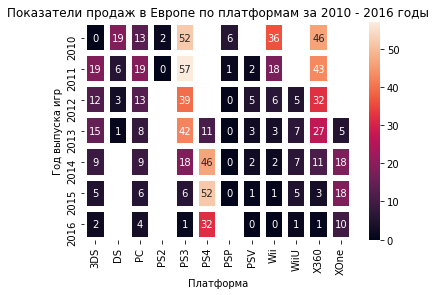

In [67]:
sns.heatmap(df.query('year_of_release > 2009').pivot_table(index='year_of_release', 
                    columns='platform', 
                    values='eu_sales', 
                    aggfunc='sum'), annot=True, fmt=".0f", linewidths=5)
plt.title("Показатели продаж в Европе по платформам за 2010 - 2016 годы")
plt.xlabel("Платформа")
plt.ylabel("Год выпуска игр")
plt.show()

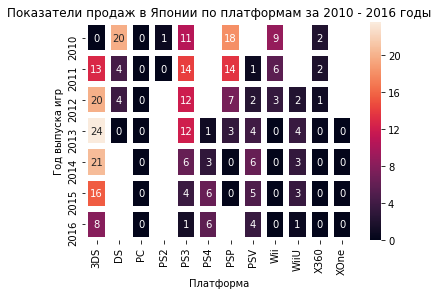

In [68]:
sns.heatmap(df.query('year_of_release > 2009').pivot_table(index='year_of_release', 
                    columns='platform', 
                    values='jp_sales', 
                    aggfunc='sum'), annot=True, fmt=".0f", linewidths=5)
plt.title("Показатели продаж в Японии по платформам за 2010 - 2016 годы")
plt.xlabel("Платформа")
plt.ylabel("Год выпуска игр")
plt.show()

Топ 5 в Северной Америке на 2016 год это PS4, XOne, 3DS, WiiU и X360.
Топ 5 в Европе на 2016 год это PS4, XOne, PC, 3DS и троица X360, PS3 и WiiU. 
Топ 5 в Японии на 2016 год это 3DS, PS4, PSV, WiiU и PS3. 
Каждая из этих платформ находится на излете своего цикла. Различия в долях продаж можно объяснить разными стадиями жизни платформы и ее успешности в целом. 
Различия между разными рынками можно объяснить отличающимся культурным кодом и особенностями рынка - Япония и 3DS это синонимы и там всегда будут сильны именно мобильные платформы. Также там традиционно слабые позиции не японских компаний, вроде Microsoft и ее платформ Xone и X360.
Европейская любовь к PC может объясняться прагматизмом и неприхотливостью, ведь зачем покупать себе отдельную платформу, когда уже есть обычный рабочий компьютер. 
Ну а в Северной Америке всегда был культ потребления, конкуренции и смешения культур, поэтому успеха там может достичь любая платформа при должном отношении к себе и потребителю.

Топ платформы на три региона - PS4 и 3DS.

Рассмотрим жанры.

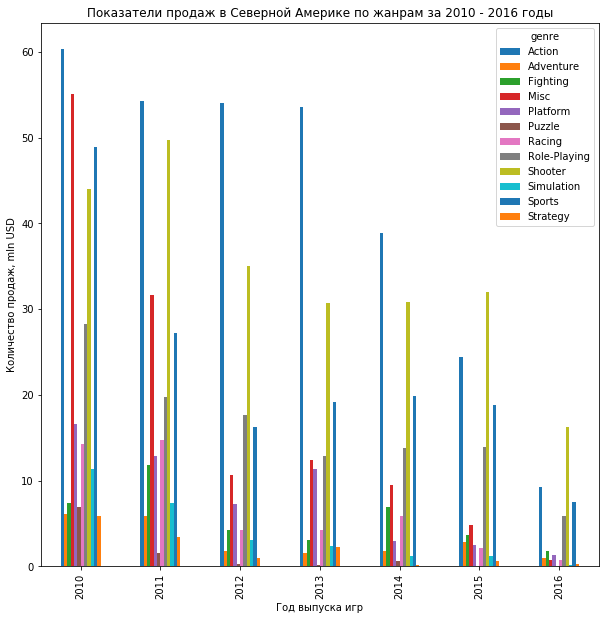

In [69]:
df.query('year_of_release > 2009').pivot_table(index='year_of_release', 
                    columns='genre', 
                    values='na_sales', 
                    aggfunc='sum').plot(kind='bar',figsize=(10,10))
plt.title("Показатели продаж в Северной Америке по жанрам за 2010 - 2016 годы")
plt.xlabel("Год выпуска игр")
plt.ylabel("Количество продаж, mln USD")
plt.show()

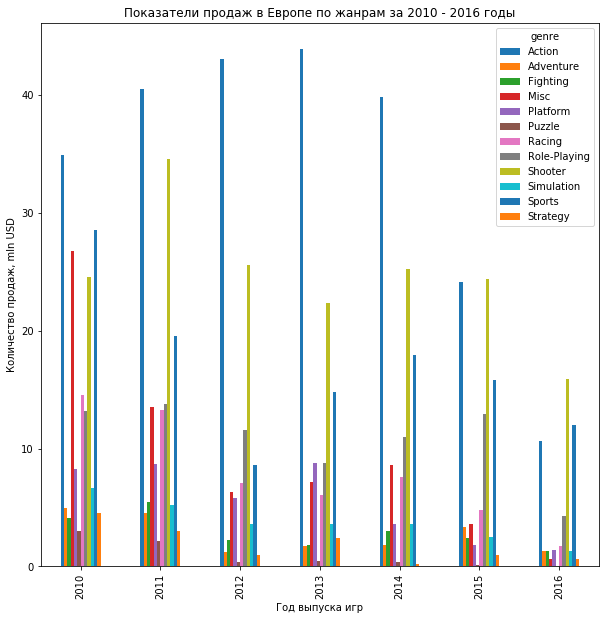

In [70]:
df.query('year_of_release > 2009').pivot_table(index='year_of_release', 
                    columns='genre', 
                    values='eu_sales', 
                    aggfunc='sum').plot(kind='bar',figsize=(10,10))
plt.title("Показатели продаж в Европе по жанрам за 2010 - 2016 годы")
plt.xlabel("Год выпуска игр")
plt.ylabel("Количество продаж, mln USD")
plt.show()

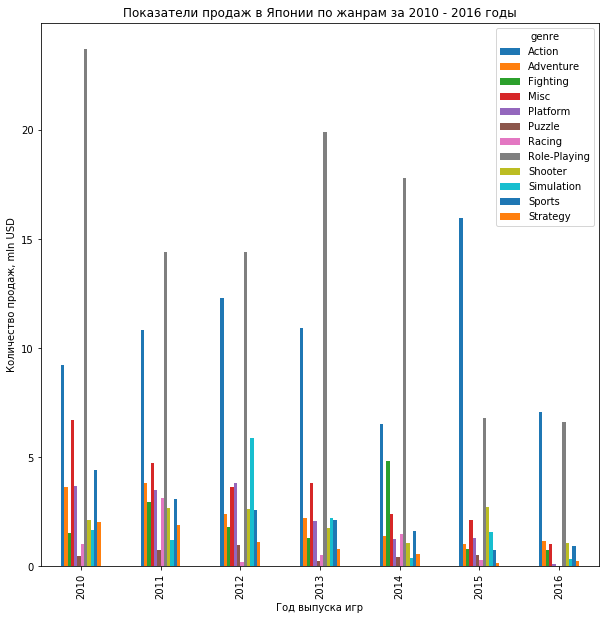

In [71]:
df.query('year_of_release > 2009').pivot_table(index='year_of_release', 
                    columns='genre', 
                    values='jp_sales', 
                    aggfunc='sum').plot(kind='bar',figsize=(10,10))
plt.title("Показатели продаж в Японии по жанрам за 2010 - 2016 годы")
plt.xlabel("Год выпуска игр")
plt.ylabel("Количество продаж, mln USD")
plt.show()

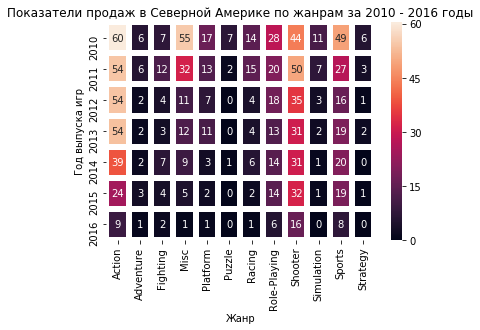

In [72]:
sns.heatmap(df.query('year_of_release > 2009').pivot_table(index='year_of_release', 
                    columns='genre', 
                    values='na_sales', 
                    aggfunc='sum'), annot=True, fmt=".0f", linewidths=5)
plt.title("Показатели продаж в Северной Америке по жанрам за 2010 - 2016 годы")
plt.xlabel("Жанр")
plt.ylabel("Год выпуска игр")
plt.show()

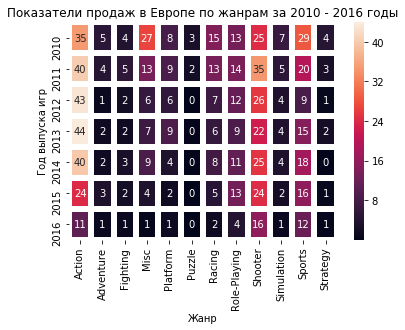

In [73]:
sns.heatmap(df.query('year_of_release > 2009').pivot_table(index='year_of_release', 
                    columns='genre', 
                    values='eu_sales', 
                    aggfunc='sum'), annot=True, fmt=".0f", linewidths=5)
plt.title("Показатели продаж в Европе по жанрам за 2010 - 2016 годы")
plt.xlabel("Жанр")
plt.ylabel("Год выпуска игр")
plt.show()

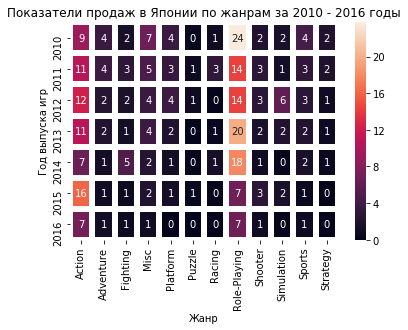

In [74]:
sns.heatmap(df.query('year_of_release > 2009').pivot_table(index='year_of_release', 
                    columns='genre', 
                    values='jp_sales', 
                    aggfunc='sum'), annot=True, fmt=".0f", linewidths=5)
plt.title("Показатели продаж в Японии по жанрам за 2010 - 2016 годы")
plt.xlabel("Жанр")
plt.ylabel("Год выпуска игр")
plt.show()

Топ жанров в Северной Америке - Shooter, Action, Sports, Role-Playing и Fighting.
Топ жанров в Европе - Shooter, Sports, Action, Role-Playing и Racing.
Топ жанров в Японии - Role-Playing, Action, и кагорта из Sports, Adventure, Fighting, Misc, Shooter.
Достаточно схожие вкусы между Америкой и Европой. Но разительные отличия с Японией. Их культура потребления видеоигр всегда была сильна и изолированна от остального мира, поэтому развивалась зачастую параллельно, не взаимодействуя.
Топ жанры на все три региона - Action и Role-Playing.

Влияет ли рейтинг ESRB на продажи в отдельном регионе? 

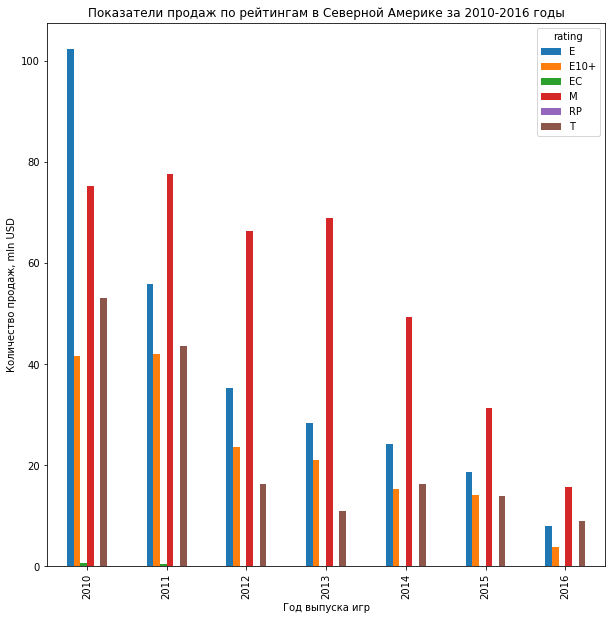

In [75]:
df.query('year_of_release > 2009').pivot_table(index='year_of_release', 
                        columns='rating', 
                        values='na_sales', 
                        aggfunc='sum').plot(kind='bar',figsize=(10,10))
plt.title("Показатели продаж по рейтингам в Северной Америке за 2010-2016 годы")
plt.xlabel("Год выпуска игр")
plt.ylabel("Количество продаж, mln USD")
plt.show()

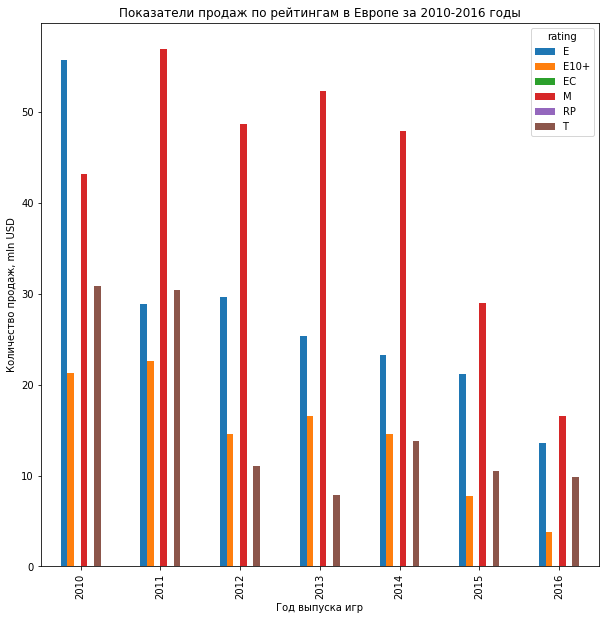

In [76]:
df.query('year_of_release > 2009').pivot_table(index='year_of_release', 
                        columns='rating', 
                        values='eu_sales', 
                        aggfunc='sum').plot(kind='bar',figsize=(10,10))
plt.title("Показатели продаж по рейтингам в Европе за 2010-2016 годы")
plt.xlabel("Год выпуска игр")
plt.ylabel("Количество продаж, mln USD")
plt.show()

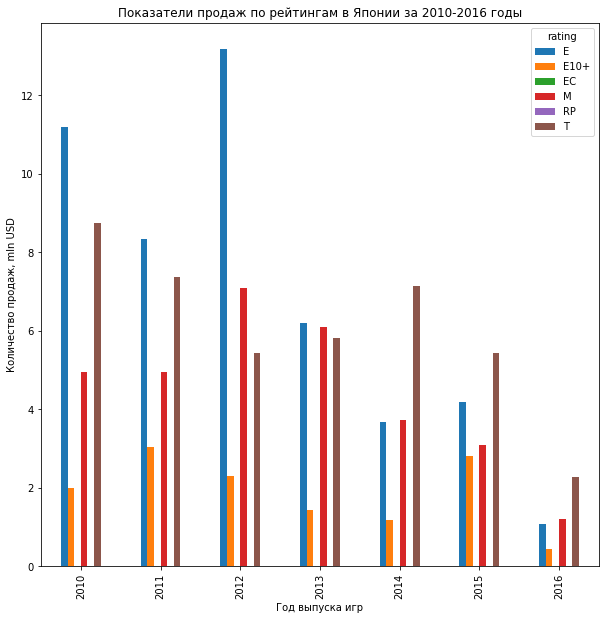

In [77]:
df.query('year_of_release > 2009').pivot_table(index='year_of_release', 
                        columns='rating', 
                        values='jp_sales', 
                        aggfunc='sum').plot(kind='bar',figsize=(10,10))
plt.title("Показатели продаж по рейтингам в Японии за 2010-2016 годы")
plt.xlabel("Год выпуска игр")
plt.ylabel("Количество продаж, mln USD")
plt.show()

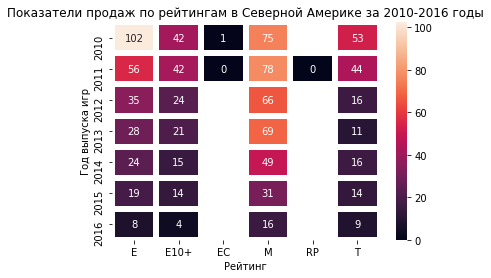

In [78]:
sns.heatmap(df.query('year_of_release > 2009').pivot_table(index='year_of_release', 
                        columns='rating', 
                        values='na_sales', 
                        aggfunc='sum'), annot=True, fmt=".0f", linewidths=5)
plt.title("Показатели продаж по рейтингам в Северной Америке за 2010-2016 годы")
plt.xlabel("Рейтинг")
plt.ylabel("Год выпуска игр")
plt.show()

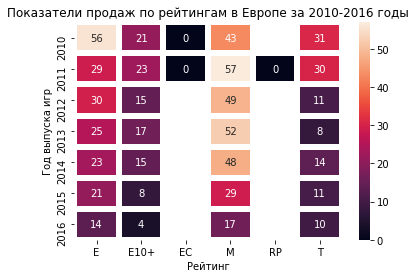

In [79]:
sns.heatmap(df.query('year_of_release > 2009').pivot_table(index='year_of_release', 
                        columns='rating', 
                        values='eu_sales', 
                        aggfunc='sum'), annot=True, fmt=".0f", linewidths=5)
plt.title("Показатели продаж по рейтингам в Европе за 2010-2016 годы")
plt.xlabel("Рейтинг")
plt.ylabel("Год выпуска игр")
plt.show()

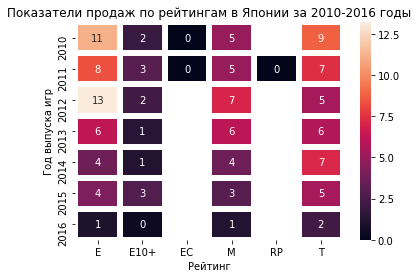

In [80]:
sns.heatmap(df.query('year_of_release > 2009').pivot_table(index='year_of_release', 
                        columns='rating', 
                        values='jp_sales', 
                        aggfunc='sum'), annot=True, fmt=".0f", linewidths=5)
plt.title("Показатели продаж по рейтингам в Японии за 2010-2016 годы")
plt.xlabel("Рейтинг")
plt.ylabel("Год выпуска игр")
plt.show()

Северная Америка: рейтинги по нисходящим продажам - М, Т, Е, Е10+
Европа: рейтинги по нисходящим продажам - М, Е, Т, Е10+
Япония: рейтинги по нисходящим продажам - Т, М, Е, Е10+
Вывод: самый убоный рейтинг для всех регионов - М и Т.

Вывод по шагу 4:
Топ платформы на три региона - PS4 и 3DS.
Топ жанры на все три региона - Action и Role-Playing.
Вывод: самый убоный рейтинг для всех регионов - М и Т.

Шаг 5. Провреить гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Примем эту гипотезу за H0. H1 будет означать, что рейтинги отличаются. Пороговое значение возьмем 0.05. Но сначала посмотрим на количество данных в выборках.

In [81]:
df.query('platform == "XOne" and user_score != "Nan"')['name'].count()

182

In [82]:
df.query('platform == "PC" and user_score != "Nan"')['name'].count()

770

182 и 770 игр. Достаточное количество данных в выборках для проверки гипотезы. Выборки не зависимы друг от друга, поэтому можно применить метод метод scipy.stats.ttest_ind.

In [83]:
alpha = 0.05
results = st.ttest_ind(df.query('platform == "XOne" and user_score != "Nan"')['user_score'], 
                       df.query('platform == "PC" and user_score != "Nan"')['user_score'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3896435533548819e-05
Отвергаем нулевую гипотезу


Гипотеза H0 отвергнута.

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные - примем это за H1. H0 будет означать, что средние рейтинги жанров равны. Пороговое значение возьмем 0.05. Но сначала посмотрим на количество данных в выборках.

In [84]:
df.query('genre == "Action" and user_score != "Nan"')['user_score'].count()

1830

In [85]:
df.query('genre == "Sports" and user_score != "Nan"')['user_score'].count()

1103

1830 и 1103 игры. Достаточное количество данных в выборках для проверки гипотезы. Выборки не зависимы друг от друга, поэтому можно применить метод метод scipy.stats.ttest_ind.

In [86]:
alpha = 0.05
results = st.ttest_ind(df.query('genre == "Action" and user_score != "Nan"')['user_score'], 
                       df.query('genre == "Sports" and user_score != "Nan"')['user_score'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10406951359049141
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу не отвергли. Вероятность равенства рейтингов существует.

Итоговый вывод:
    - Изучив данный массив, получилось сформировать приоритетную стратегию для рекламной кампании на 2017 год. Предпочтительными выглядят игры, выпускаемые на платформу PS4 в жанре Action и с рейтингом M или T. Далее надо понимать для какого рынка будет данная рекламная кампания, ведь везде свои маленькие приоритеты (или большие, как в Японии).
    - Также необходимо отметить то что на 2017 год не стоит отводить слишком большой рекламный бюджет, ведь каждая из изученных платформ находится на финальном отрезке своего существования и большого уровня продаж какой-либо игры сложно ожидать. Это может произойти либо при поддержке производителя платформы (возможно, вкупе с презентацией новой платформы), либо при выпуске чего-либо масштабного и ожидаемого, но в этом случае продажи и так будут неплохими.
Рекомендация: 
    - Урезать рекламный бюджет на игры на 2017 год, в ожидании новых платформ, перераспределив средства либо на рекламу на следующий год, либо на рекламу внутреигровых покупок через этот магазин в проектах, которые уже достигли глобального успеха. 